## Lab 4: Exploring the Exponential Distribution and Poisson Process

### Due by April 29

In this homework, we study the relationship between the exponential distribution and the Poisson process via visualization. 



In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Question 1: Data Preparation

1.1 Create a variable called `lambda_param` and assign it the value `1`. It represents $\lambda_{param}$ for a Poisson process.


1.2 Generate a $10\,000 \times 1\,000$ numpy matrix where each entry is drawn from the exponential distribution with rate `lambda_param`.


1.3 Convert this matrix into a pandas DataFrame called `df_exp` with **10,000 rows** and **1,000 columns**. Rename the column names to `Trial_1, Trial_2, ..., Trial_1000`.

- **Rows** represent independent observations (or successive events).
- **Columns** represent different trials (independent Poisson process, or independent experiments).


In [2]:
lambda_param = 1
expon_dist = stats.expon(scale=1/lambda_param)

columns = []
for i in range(1000):
    sample_list = expon_dist.rvs(size=10000)
    columns.append(pd.Series(sample_list))

df_exp = pd.concat(columns, axis=1)
df_exp.columns = [f'Trial_{i+1}' for i in range(1000)]
df_exp.head()

,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7,Trial_8,Trial_9,Trial_10,...,Trial_991,Trial_992,Trial_993,Trial_994,Trial_995,Trial_996,Trial_997,Trial_998,Trial_999,Trial_1000
0,2.373459,0.153518,0.904602,3.571389,1.917760,1.819440,0.244554,1.019457,0.943041,1.200406,...,0.672758,0.115787,1.768311,1.503879,0.425303,2.216817,0.639189,0.740177,0.580597,0.045970
1,1.075473,0.856500,1.527842,0.152732,1.052079,0.116049,1.774368,1.004455,0.244236,2.397718,...,0.377198,0.798278,0.568475,0.225461,1.303521,3.561062,4.573905,0.244522,0.605534,1.159924
2,1.570069,1.659854,1.375694,0.325503,1.752313,0.805965,1.131259,0.485809,0.686800,0.436945,...,0.329874,0.086572,0.883153,0.037277,0.893480,0.504841,2.875148,1.780700,2.259085,2.093488
3,0.036489,2.222749,1.736692,0.190493,0.948933,0.508687,0.122011,0.683082,2.416116,0.154862,...,0.136449,0.233717,2.508199,0.762412,0.592029,1.749483,0.565693,0.467699,2.673117,0.405751
4,0.562836,0.695666,1.485181,2.278483,1.216394,0.105460,0.232538,0.921571,1.845509,0.686977,...,2.295833,0.783737,1.043218,0.486184,0.604294,0.097703,0.495164,0.858620,0.831850,1.307745


### Question 2: Simulating Poisson process.

For each column in `df_exp`, compute the cumulative sum, i.e., row $i$ counts the total waiting time until the $i$th arrival happens for each Poisson process. 

Store the result in a new DataFrame `df_cumsum` (also $10\,000 \times 1\,000$). Adjust the row index of `df_cumsum` to start from `1` (instead of the default `0`).



Hint: Use function `cumsum()`.

In [3]:
df_cumsum = np.cumsum(df_exp)
df_cumsum.index = df_cumsum.index +1
df_cumsum.head()

,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7,Trial_8,Trial_9,Trial_10,...,Trial_991,Trial_992,Trial_993,Trial_994,Trial_995,Trial_996,Trial_997,Trial_998,Trial_999,Trial_1000
1,2.373459,0.153518,0.904602,3.571389,1.917760,1.819440,0.244554,1.019457,0.943041,1.200406,...,0.672758,0.115787,1.768311,1.503879,0.425303,2.216817,0.639189,0.740177,0.580597,0.045970
2,3.448932,1.010018,2.432444,3.724121,2.969839,1.935489,2.018922,2.023912,1.187277,3.598124,...,1.049956,0.914065,2.336786,1.729341,1.728824,5.777879,5.213094,0.984699,1.186131,1.205894
3,5.019001,2.669871,3.808138,4.049624,4.722152,2.741454,3.150181,2.509721,1.874077,4.035069,...,1.379830,1.000637,3.219939,1.766618,2.622303,6.282720,8.088242,2.765399,3.445216,3.299382
4,5.055489,4.892620,5.544831,4.240117,5.671085,3.250141,3.272193,3.192803,4.290193,4.189931,...,1.516279,1.234354,5.728139,2.529030,3.214332,8.032204,8.653935,3.233098,6.118334,3.705133
5,5.618326,5.588286,7.030012,6.518600,6.887479,3.355601,3.504731,4.114375,6.135702,4.876908,...,3.812113,2.018090,6.771356,3.015213,3.818626,8.129907,9.149099,4.091719,6.950184,5.012878


### Question 3: Comparison with the Uniform Distribution

3.1. Extract all values from `df_cumsum` that are less than `10` and flatten them into a one-dimensional array named `cumsum_values_lt_10`.


3.2. Plot the density distribution of `cumsum_values_lt_10` using `sns.histplot`.


3.3. Generate a numpy array named `uniform_values` of `100,000` samples drawn from a uniform distribution over the interval `[0, 10]`. On the same plot, display its density distribution.


3.4. In a brief paragraph, describe any similarities or differences observed between these two distributions.


Hint: You can use `np.random.uniform` to generate uniform distribution.

<Axes: ylabel='Count'>

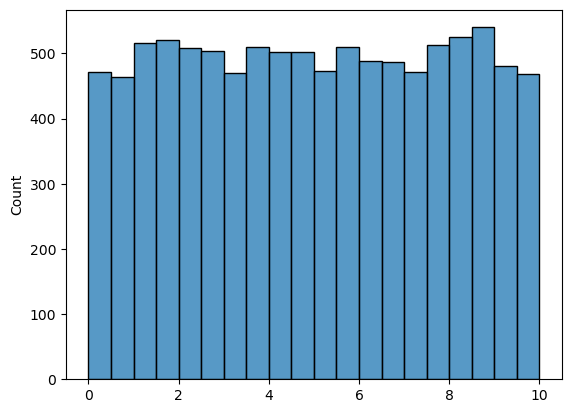

In [5]:
arr = df_cumsum[df_cumsum < 10].to_numpy()
array = arr[~np.isnan(arr)] 
cumsum_values_lt_10 = np.ndarray.flatten(array)

sns.histplot(cumsum_values_lt_10,bins=20)

<Axes: ylabel='Count'>

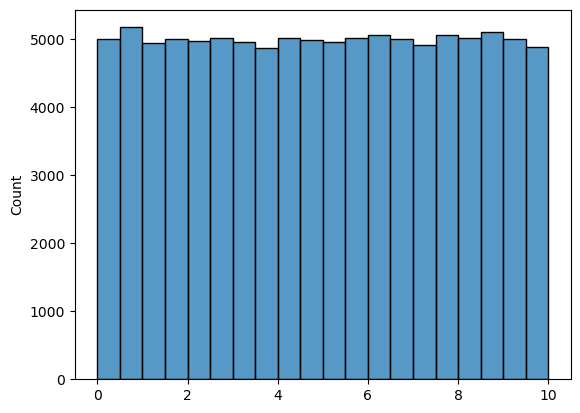

In [6]:
uni_dist = np.random.uniform(low=0,high=10,size=100000)
sns.histplot(uni_dist,bins=20)

#### 3.4 
    The two distributions are all uniform distribution. However, the first one fluctuates around 500, whereas the second on fluctuate around 5000. The first one have larger variance.  

### Question 4: Maximum Index Analysis and Comparison with Poisson Distribution

4.1. For each column in `df_cumsum`, determine the maximum row index at which the cumulative sum remains less than or equal to `10`. Create a Series named `max_indices` that contains these indices (each index represents the number of observations or 'events' before exceeding 10).

Intuitively, `max_indices` counts the total number of arrivals before time `10`.


4.2. Generate `100,000` Poisson-distributed random samples with parameter $\lambda = 10 \times \lambda_{param}$  using `numpy.random.poisson`, storing the samples in `poisson_samples`.


4.3. Plot the density distribution of `max_indices` using `sns.histplot` and overlay the plot of `poisson_samples` on the same figure.


4.4. In a brief paragraph, compare the empirical distribution of `max_indices` with the theoretical Poisson distribution.


In [7]:
list_max_indices = []
for column in df_cumsum:
    i_column = df_cumsum[column]
    indices = 0
    for val in i_column:
        indices += 1
        if val>=10:
            break
    list_max_indices.append(indices)
max_indices = pd.Series(list_max_indices)
max_indices

0      10
1      10
2      10
3       7
4      10
       ..
995     8
996     8
997    16
998    13
999     9
Length: 1000, dtype: int64

In [8]:
poisson_samples = np.random.poisson(lam=10 * lambda_param, size=100000)

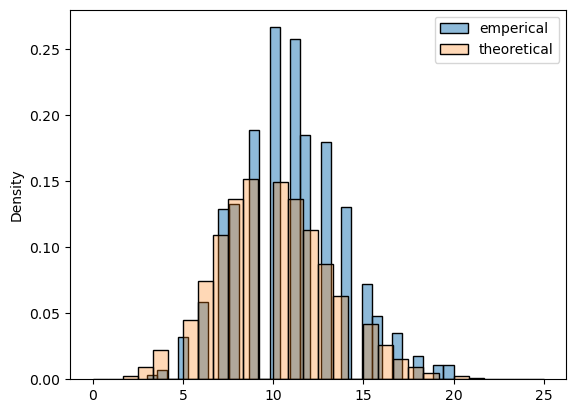

In [9]:
sns.histplot(max_indices, stat='density', label='emperical', alpha=0.5, bins=30)
sns.histplot(poisson_samples, stat='density', label='theoretical', alpha=0.3, bins=30)
plt.legend()
plt.show()

#### 4.4 

    The stimulated emperical distribution peaks higher than the theoretical distribution and the peak shifts slightly to the right. The theoretical distribution also have smoother curve than the emperical one. 

### Question 5: Repetition with $\lambda_{param}=5$

- Repeat Questions 1 to 4 using a new rate parameter `lambda_param = 5`.
- Generate updated code and new distribution plots for:
  - Cumulative sum values compared with the uniform distribution.
  - Maximum row index compared with the Poisson distribution.


In [10]:
lambda_param = 5

In [11]:
#Q1
expon_dist = stats.expon(scale=1/lambda_param)

columns = []
for i in range(1000):
    sample_list = expon_dist.rvs(size=10000)
    columns.append(pd.Series(sample_list))

df_exp = pd.concat(columns, axis=1)
df_exp.columns = [f'Trial_{i+1}' for i in range(1000)]

In [12]:
#Q2
df2_cumsum = np.cumsum(df_exp)
df2_cumsum.index = df2_cumsum.index +1

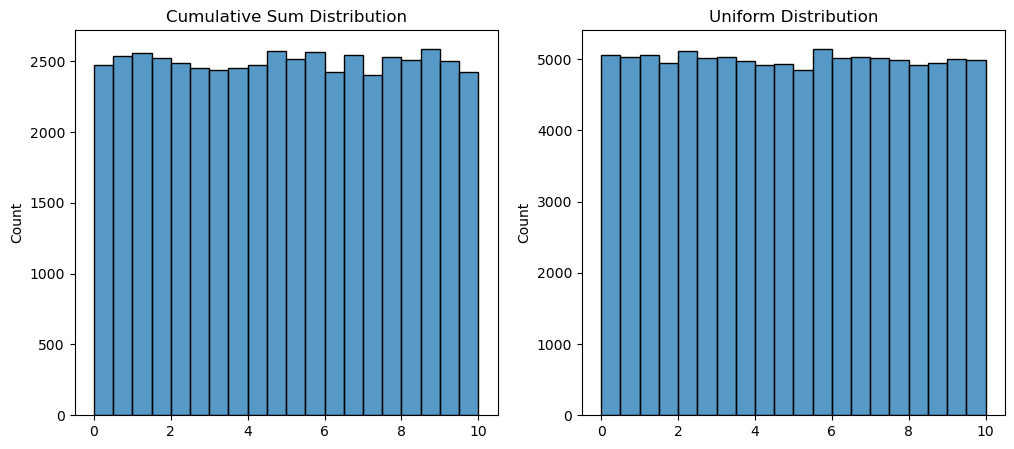

In [13]:
#Q3
arr = df2_cumsum[df2_cumsum < 10].to_numpy()
array = arr[~np.isnan(arr)] 
cumsum_values_lt_10 = np.ndarray.flatten(array)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot
sns.histplot(cumsum_values_lt_10,bins=20, ax=axes[0])
axes[0].set_title('Cumulative Sum Distribution')

# Plot on the second subplot
uni_dist = np.random.uniform(low=0,high=10,size=100000)
sns.histplot(uni_dist,bins=20, ax=axes[1])
axes[1].set_title('Uniform Distribution')

plt.show()

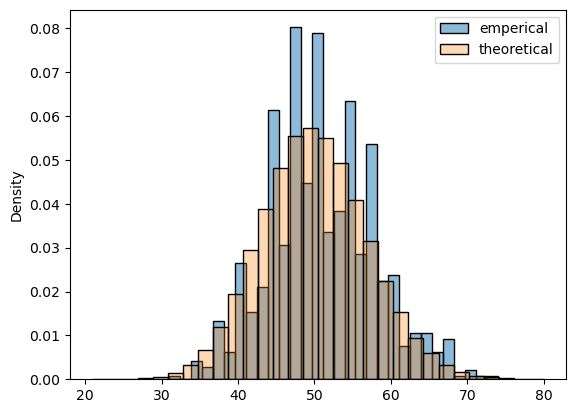

In [17]:
#Q4
list_max_indices = []
for column in df2_cumsum:
    i_column = df2_cumsum[column]
    indices = 0
    for val in i_column:
        indices += 1
        if val>=10:
            break
    list_max_indices.append(indices)
max_indices = pd.Series(list_max_indices)

poisson_samples = np.random.poisson(lam=10 * lambda_param, size=100000)

sns.histplot(max_indices, stat='density', label='emperical', alpha=0.5, bins=30)
sns.histplot(poisson_samples, stat='density', label='theoretical', alpha=0.3, bins=30)
plt.legend()
plt.show()

### Question 6: Joint Distribution

In this question, we focus on the number of arrivals before \(T=5\) and \(T=10\) for each trial (i.e., each column in `df_cumsum`). 

6.1. For each trial, compute:
   - The number of arrivals before \(T=5\) (i.e., the maximum row index where the cumulative sum is $\leq5$) and store these in a Series called `N_T5`.
   - The number of arrivals before \(T=10\) (i.e., the maximum row index where the cumulative sum is $\leq10$) and store these in a Series called `N_T10`.

6.2. Visualize the joint relationship between `N_T5` and `N_T10` using:
   - A scatter plot to explore their joint behavior.
   - Adding marginal distributions on the sides of the scatter plot.

6.3 What are marginal distributions for `N_T5` and `N_T10`? Are they correlated?

In [15]:
N_T5 = df_cumsum.apply(lambda col: (col <= 5).sum(), axis=0)
N_T10 = df_cumsum.apply(lambda col: (col <= 10).sum(), axis=0)

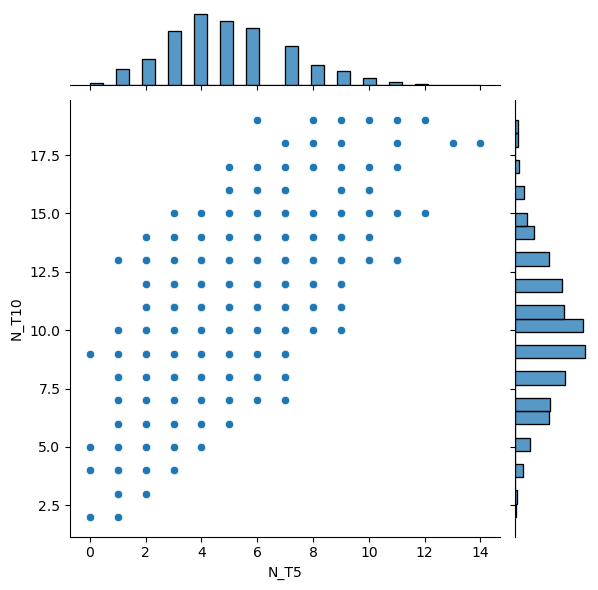

In [16]:
# Combine into DataFrame for plotting
df_plot = pd.DataFrame({'N_T5': N_T5, 'N_T10': N_T10})

# Joint scatter plot with marginal distributions
sns.jointplot(data=df_plot, x='N_T5', y='N_T10', kind='scatter', marginal_kws=dict(bins=30))
plt.show()

#### 6.5 
    The marginal distributions are all possion distribution. They are correlated as shown in the scatter plot. 